<a href="https://colab.research.google.com/github/dharsh70/Style-Transfer-GAN/blob/main/2101043_FINAL_GENAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Style Transfer

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
class StyleTransferDataset(Dataset):
    def __init__(self, content_paths, style_paths, transform=None):
        self.content_paths = content_paths
        self.style_paths = style_paths
        self.transform = transform

    def __len__(self):
        return len(self.content_paths)

    def __getitem__(self, idx):
        content_path = self.content_paths[idx]
        style_path = self.style_paths[idx % len(self.style_paths)]

        content_img = Image.open(content_path).convert("RGB")
        style_img = Image.open(style_path).convert("RGB")

        if self.transform:
            content_img = self.transform(content_img)
            style_img = self.transform(style_img)

        return content_img, style_img

content_paths = ["style2.jpg","style3.jpg"]
style_paths = ["content2.jpg","flowerr.jpg","content3.jpg"]

transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

dataset = StyleTransferDataset(content_paths, style_paths, transform=transform)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

class StyleGAN(nn.Module):
    def __init__(self):
        super(StyleGAN, self).__init__()
        self.generator = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 3, kernel_size=3, padding=1),
            nn.Tanh()
        )

    def forward(self, x):
        return self.generator(x)

Epoch [1/10], Average Loss: 0.1837
Epoch [2/10], Average Loss: 0.1593
Epoch [3/10], Average Loss: 0.1485
Epoch [4/10], Average Loss: 0.1473
Epoch [5/10], Average Loss: 0.1489
Epoch [6/10], Average Loss: 0.1492
Epoch [7/10], Average Loss: 0.1483
Epoch [8/10], Average Loss: 0.1472
Epoch [9/10], Average Loss: 0.1460
Epoch [10/10], Average Loss: 0.1444


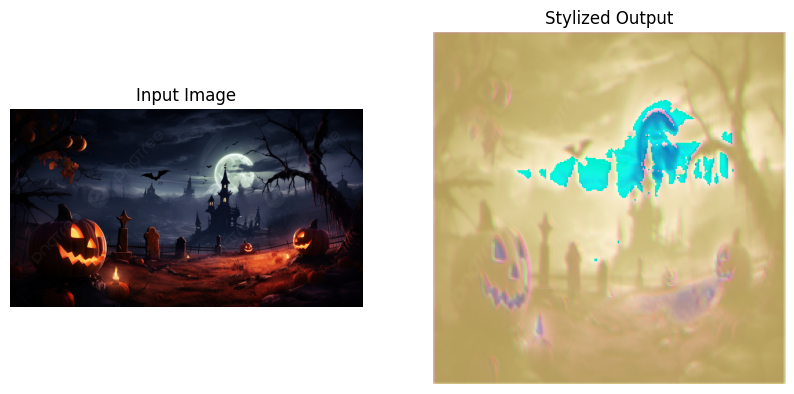

In [ ]:
model = StyleGAN()

optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_function = nn.MSELoss()

num_epochs = 10

for epoch in range(num_epochs):
    total_loss = 0.0

    for content_img, style_img in dataloader:
        optimizer.zero_grad()

        stylized_img = model(content_img)

        loss = loss_function(stylized_img, style_img)

        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(dataloader)
    print(f"Epoch [{epoch+1}/{num_epochs}], Average Loss: {avg_loss:.4f}")

input_img_path = "style2.jpg"
input_img = Image.open(input_img_path).convert("RGB")
input_tensor = transform(input_img).unsqueeze(0)
output_img = model(input_tensor)

output_img = output_img.squeeze(0).detach().cpu()
output_img = transforms.ToPILImage()(output_img)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(input_img)
plt.title("Input Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(output_img)
plt.title("Stylized Output")
plt.axis("off")

plt.show()

In [ ]:
# @title Default title text
import random

class AutonomousVehiclePromptEngine:
    def __init__(self):
        self.emergency_keywords = {"urgent", "emergency", "immediate", "critical", "severe", "danger"}
        self.symptom_keywords = {"collision", "malfunction", "error", "anomaly", "obstacle", "loss of control", "sudden stop", "abnormal acceleration", "erratic behavior"}
        self.operation_prompt = "Attention: The vehicle is encountering critical issues. Please pull over safely and contact technical support immediately."
        self.malfunction_prompt = "Warning: The vehicle is experiencing a malfunction. Please pull over and wait for further instructions or assistance."
        self.movement_prompt = "Caution: The vehicle's movement is not normal. Please ensure safety and check surroundings before proceeding."
        self.normal_prompt = "No immediate need for intervention. The vehicle is operating within normal parameters. Please continue monitoring."

    def assess_symptoms(self, symptoms):
        return any(keyword in self.emergency_keywords for keyword in symptoms)

    def generate_prompt(self, symptoms):
        if self.assess_symptoms(symptoms):
            return self.operation_prompt
        elif any(keyword in self.symptom_keywords for keyword in symptoms):
            return self.malfunction_prompt
        elif any(keyword in {"sudden stop", "abnormal acceleration", "erratic behavior"} for keyword in symptoms):
            return self.movement_prompt
        else:
            return self.normal_prompt

prompt_engine = AutonomousVehiclePromptEngine()

vehicle_symptoms = set(input("Enter vehicle symptoms, separated by commas: ").lower().split(','))

prompt = prompt_engine.generate_prompt(vehicle_symptoms)
print(prompt)
